In [24]:
import pandas as pd
import json

In [25]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaSent-EN-test',
  'Macro F1': 0.326583349247835,
  'Micro F1': 0.34615384615384615,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'en': {'Macro F1': 0.326583349247835,
    'Micro F1': 0.34615384615384615}}},
 {'Model': 'dummy-most_frequent',
  'Test Dataset': 'ParlaSent-EN-test',
  'Macro F1': 0.16293713067906615,
  'Micro F1': 0.32346153846153847,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'en': {'Macro F1': 0.16293713067906615,
    'Micro F1': 0.32346153846153847}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaSent-BCS-test',
  'Macro F1': 0.32088531301944173,
  'Micro F1': 0.3630769230769231,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'sr': {'Macro F1': 0.32672655639923676,
    'Micro F1': 0.3612662942271881},
   'hr': {'Macro F1': 0.3158926111941632, 'Micro F1': 0.36452095808383234},
   'bs': {'Macro F1': 0.3200313937316413, 'Mic

In [26]:
results_sent = []

lang_map = {
    "English": "en",
    "Croatian": "hr",
    "Serbian": "sr",
    "Bosnian": "bs"
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian", "Serbian", "Bosnian"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang_code]["Macro F1"]
            cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang_code]["Micro F1"]
    results_sent.append(cur_result)

temp_results_df = pd.DataFrame(results_sent)
temp_results_df

,Model,English (macro-F1),English (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-stratified,0.326583,0.346154,NaN,NaN,NaN,NaN,NaN,NaN
1,dummy-most_frequent,0.162937,0.323462,NaN,NaN,NaN,NaN,NaN,NaN
2,dummy-stratified,NaN,NaN,0.315893,0.364521,0.326727,0.361266,0.320031,0.363158
3,dummy-most_frequent,NaN,NaN,0.196906,0.419162,0.210616,0.461825,0.215896,0.478947
4,COMPLEMENTNB,NaN,NaN,0.431904,0.452096,0.441573,0.476723,0.447165,0.494737
5,SVC,NaN,NaN,0.345090,0.496257,0.369759,0.535382,0.345019,0.531579
6,SVC,0.346150,0.395385,NaN,NaN,NaN,NaN,NaN,NaN
7,COMPLEMENTNB,0.262311,0.327692,NaN,NaN,NaN,NaN,NaN,NaN
8,XLM-R-ParlaSent,0.727563,0.726538,NaN,NaN,NaN,NaN,NaN,NaN
9,XLM-R-ParlaSent,NaN,NaN,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053


In [27]:
merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian", "Serbian", "Bosnian"]:
				if x[f"{lang} (macro-F1)"] >= 0:
					model_dict[f"{lang} (macro-F1)"] = x[f"{lang} (macro-F1)"]
				if x[f"{lang} (micro-F1)"] >= 0:
					model_dict[f"{lang} (micro-F1)"] = x[f"{lang} (micro-F1)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,English (macro-F1),English (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-stratified,0.326583,0.346154,0.315893,0.364521,0.326727,0.361266,0.320031,0.363158
1,dummy-most_frequent,0.162937,0.323462,0.196906,0.419162,0.210616,0.461825,0.215896,0.478947
2,COMPLEMENTNB,0.262311,0.327692,0.431904,0.452096,0.441573,0.476723,0.447165,0.494737
3,SVC,0.346150,0.395385,0.345090,0.496257,0.369759,0.535382,0.345019,0.531579
4,XLM-R-ParlaSent,0.727563,0.726538,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053
5,deepseek-r1:14b,0.616906,0.617308,0.594813,0.613024,0.597349,0.614525,0.567660,0.589474
6,llama3.3:latest,0.748669,0.745000,0.727872,0.742515,0.692514,0.711359,0.673139,0.710526
7,gemma3:27b,0.767600,0.766154,0.728032,0.741766,0.706839,0.725326,0.718384,0.742105
8,gpt-4o-mini-2024-07-18,0.733126,0.733462,0.686036,0.718563,0.681355,0.705773,0.593245,0.652632
9,gpt-3.5-turbo-0125,0.699770,0.697692,0.651793,0.672904,0.664137,0.670391,0.583875,0.626316


In [28]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [1]:
import pandas as pd

In [2]:
results_df = pd.read_json("results.json", orient="records", lines=True)

In [3]:
results_df

,Model,English (macro-F1),English (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-stratified,0.326583,0.346154,0.315893,0.364521,0.326727,0.361266,0.320031,0.363158
1,dummy-most_frequent,0.162937,0.323462,0.196906,0.419162,0.210616,0.461825,0.215896,0.478947
2,COMPLEMENTNB,0.262311,0.327692,0.431904,0.452096,0.441573,0.476723,0.447165,0.494737
3,SVC,0.346150,0.395385,0.345090,0.496257,0.369759,0.535382,0.345019,0.531579
4,XLM-R-ParlaSent,0.727563,0.726538,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053
5,deepseek-r1:14b,0.616906,0.617308,0.594813,0.613024,0.597349,0.614525,0.567660,0.589474
6,llama3.3:latest,0.748669,0.745000,0.727872,0.742515,0.692514,0.711359,0.673139,0.710526
7,gemma3:27b,0.767600,0.766154,0.728032,0.741766,0.706839,0.725326,0.718384,0.742105
8,gpt-4o-mini-2024-07-18,0.733126,0.733462,0.686036,0.718563,0.681355,0.705773,0.593245,0.652632
9,gpt-3.5-turbo-0125,0.699770,0.697692,0.651793,0.672904,0.664137,0.670391,0.583875,0.626316


In [4]:
results_df = results_df[~results_df["Model"].isin( ["dummy-stratified"])]

In [5]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "XLM-R-ParlaSent": "Fine-Tuned BERT-Like Model",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gpt-5": "GPT-5",
    "gpt-5-nano-2025-08-07": "GPT-5-Nano",
    "llama4:scout": "LLaMA 4 Scout",
    "qwen3:32b": "Qwen 3",
    'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
    'google/gemini-2.5-flash': "Gemini 2.5 Flash",
    'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
    'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
    'cohere/command-a': "Command A"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns

results_df = results_df[['Model', 'Croatian (macro-F1)', 'Croatian (micro-F1)', 'Serbian (macro-F1)',
       'Serbian (micro-F1)', 'Bosnian (macro-F1)', 'Bosnian (micro-F1)','English (macro-F1)', 'English (micro-F1)',]]

/tmp/ipykernel_2347506/1872612580.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Model"] = results_df["Model"].replace(rename_dict)


In [6]:
print(results_df.sort_values(by="Croatian (macro-F1)", ascending=False).to_markdown(index=False))

| Model                      |   Croatian (macro-F1) |   Croatian (micro-F1) |   Serbian (macro-F1) |   Serbian (micro-F1) |   Bosnian (macro-F1) |   Bosnian (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|:---------------------------|----------------------:|----------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|
| Gemini 2.5 Flash           |              0.76076  |              0.786677 |             0.734062 |             0.760708 |             0.691179 |             0.731579 |             0.767511 |             0.767692 |
| GPT-4o                     |              0.756521 |              0.782186 |             0.738277 |             0.764432 |             0.700967 |             0.747368 |             0.77108  |             0.773077 |
| GPT-5                      |              0.755703 |              0.773204 |             0.768287 |             0.783054 |        

In [7]:
results_df = results_df[results_df["Model"].isin(['Fine-Tuned BERT-Like Model', 'Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)'])]

results_df.sort_values(by="Model", ascending=True)

,Model,Croatian (macro-F1),Croatian (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1),English (macro-F1),English (micro-F1)
5,DeepSeek-R1-Distill,0.594813,0.613024,0.597349,0.614525,0.567660,0.589474,0.616906,0.617308
1,Dummy (Frequent),0.196906,0.419162,0.210616,0.461825,0.215896,0.478947,0.162937,0.323462
4,Fine-Tuned BERT-Like Model,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053,0.727563,0.726538
9,GPT-3.5-Turbo,0.651793,0.672904,0.664137,0.670391,0.583875,0.626316,0.699770,0.697692
10,GPT-4o,0.756521,0.782186,0.738277,0.764432,0.700967,0.747368,0.771080,0.773077
13,GPT-5,0.755703,0.773204,0.768287,0.783054,0.758745,0.778947,0.784195,0.781923
16,Gemini 2.5 Flash,0.760760,0.786677,0.734062,0.760708,0.691179,0.731579,0.767511,0.767692
7,Gemma 3,0.728032,0.741766,0.706839,0.725326,0.718384,0.742105,0.767600,0.766154
6,LLaMA 3.3,0.727872,0.742515,0.692514,0.711359,0.673139,0.710526,0.748669,0.745000
17,Mistral Medium 3.1,0.733918,0.755240,0.704335,0.718211,0.641216,0.673684,0.759354,0.756684


In [8]:
columns_to_drop = []
for column in results_df.columns.to_list():
	if "macro-F1" not in column:
		columns_to_drop.append(column)

print(columns_to_drop)

# Add a column with averages
results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)
results_df

['Model', 'Croatian (micro-F1)', 'Serbian (micro-F1)', 'Bosnian (micro-F1)', 'English (micro-F1)']


,Model,Croatian (macro-F1),Croatian (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1),English (macro-F1),English (micro-F1),Average (macro-F1)
1,Dummy (Frequent),0.196906,0.419162,0.210616,0.461825,0.215896,0.478947,0.162937,0.323462,0.196589
4,Fine-Tuned BERT-Like Model,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053,0.727563,0.726538,0.708096
5,DeepSeek-R1-Distill,0.594813,0.613024,0.597349,0.614525,0.567660,0.589474,0.616906,0.617308,0.594182
6,LLaMA 3.3,0.727872,0.742515,0.692514,0.711359,0.673139,0.710526,0.748669,0.745000,0.710549
7,Gemma 3,0.728032,0.741766,0.706839,0.725326,0.718384,0.742105,0.767600,0.766154,0.730214
9,GPT-3.5-Turbo,0.651793,0.672904,0.664137,0.670391,0.583875,0.626316,0.699770,0.697692,0.649894
10,GPT-4o,0.756521,0.782186,0.738277,0.764432,0.700967,0.747368,0.771080,0.773077,0.741711
13,GPT-5,0.755703,0.773204,0.768287,0.783054,0.758745,0.778947,0.784195,0.781923,0.766732
14,Qwen 3,0.704196,0.728293,0.706558,0.723464,0.614208,0.657895,0.743945,0.743462,0.692227
16,Gemini 2.5 Flash,0.760760,0.786677,0.734062,0.760708,0.691179,0.731579,0.767511,0.767692,0.738378


<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

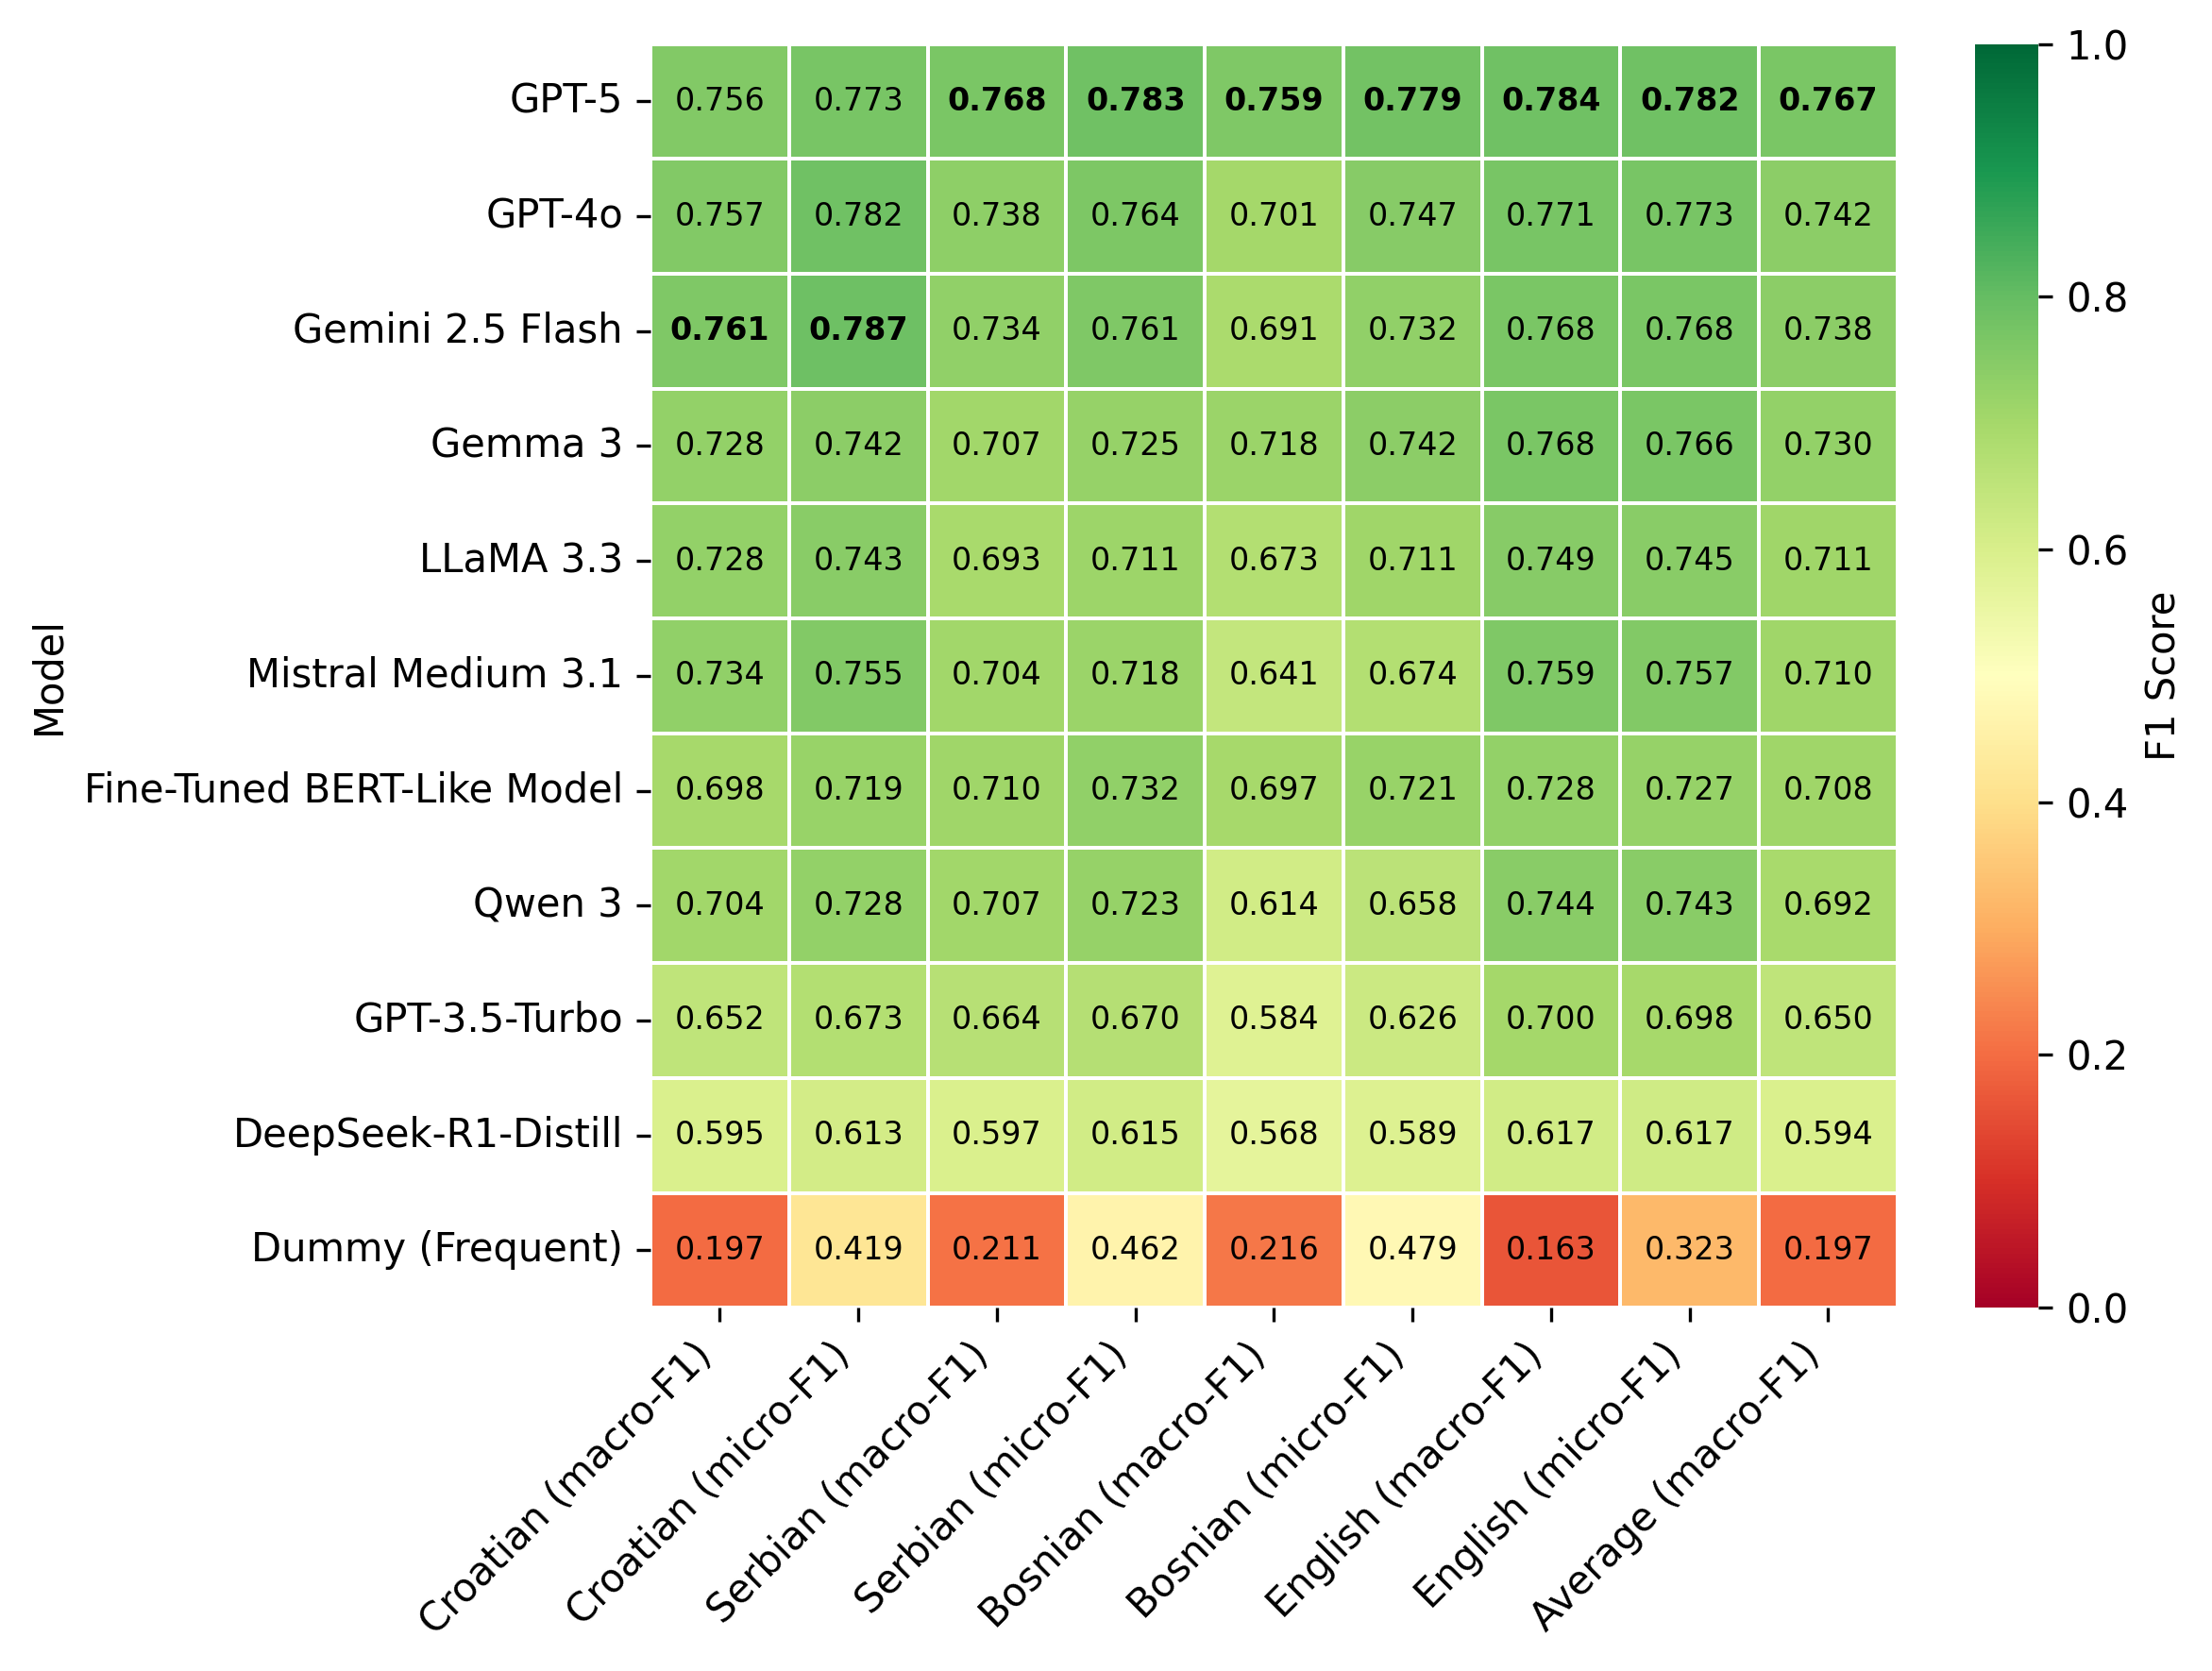

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=300)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Average (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("sentiment-results-heatmap.png", dpi=300)
plt


In [10]:
# Rename rule
def create_rename_dict(df):
	columns = df.columns.to_list()
	new_dict = {}
	for column in columns:
		if "macro-F1" in column:
			new_dict[column] = column.replace(" (macro-F1)", "")
	return new_dict

rename_dict = create_rename_dict(results_df)
print(rename_dict)

results_df.rename(columns=rename_dict, inplace=True)
results_df

{'Croatian (macro-F1)': 'Croatian', 'Serbian (macro-F1)': 'Serbian', 'Bosnian (macro-F1)': 'Bosnian', 'English (macro-F1)': 'English', 'Average (macro-F1)': 'Average'}


,Model,Croatian,Croatian (micro-F1),Serbian,Serbian (micro-F1),Bosnian,Bosnian (micro-F1),English,English (micro-F1),Average
1,Dummy (Frequent),0.196906,0.419162,0.210616,0.461825,0.215896,0.478947,0.162937,0.323462,0.196589
4,Fine-Tuned BERT-Like Model,0.698117,0.719311,0.710006,0.731844,0.696696,0.721053,0.727563,0.726538,0.708096
5,DeepSeek-R1-Distill,0.594813,0.613024,0.597349,0.614525,0.567660,0.589474,0.616906,0.617308,0.594182
6,LLaMA 3.3,0.727872,0.742515,0.692514,0.711359,0.673139,0.710526,0.748669,0.745000,0.710549
7,Gemma 3,0.728032,0.741766,0.706839,0.725326,0.718384,0.742105,0.767600,0.766154,0.730214
9,GPT-3.5-Turbo,0.651793,0.672904,0.664137,0.670391,0.583875,0.626316,0.699770,0.697692,0.649894
10,GPT-4o,0.756521,0.782186,0.738277,0.764432,0.700967,0.747368,0.771080,0.773077,0.741711
13,GPT-5,0.755703,0.773204,0.768287,0.783054,0.758745,0.778947,0.784195,0.781923,0.766732
14,Qwen 3,0.704196,0.728293,0.706558,0.723464,0.614208,0.657895,0.743945,0.743462,0.692227
16,Gemini 2.5 Flash,0.760760,0.786677,0.734062,0.760708,0.691179,0.731579,0.767511,0.767692,0.738378


In [11]:
results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)", "Fine-Tuned BERT-Like Model", 'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model", 'Serbian (micro-F1)', 'Croatian (micro-F1)', 'English (micro-F1)', 'Bosnian (micro-F1)', 'Average']).transpose()

results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash','Gemma 3', 'LLaMA 3.3', 'Qwen 3']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Gemini 2.5 Flash,Gemma 3,LLaMA 3.3,Qwen 3
Croatian,0.651793,0.756521,0.755703,0.733918,0.760760,0.728032,0.727872,0.704196
Serbian,0.664137,0.738277,0.768287,0.704335,0.734062,0.706839,0.692514,0.706558
Bosnian,0.583875,0.700967,0.758745,0.641216,0.691179,0.718384,0.673139,0.614208
English,0.699770,0.771080,0.784195,0.759354,0.767511,0.767600,0.748669,0.743945


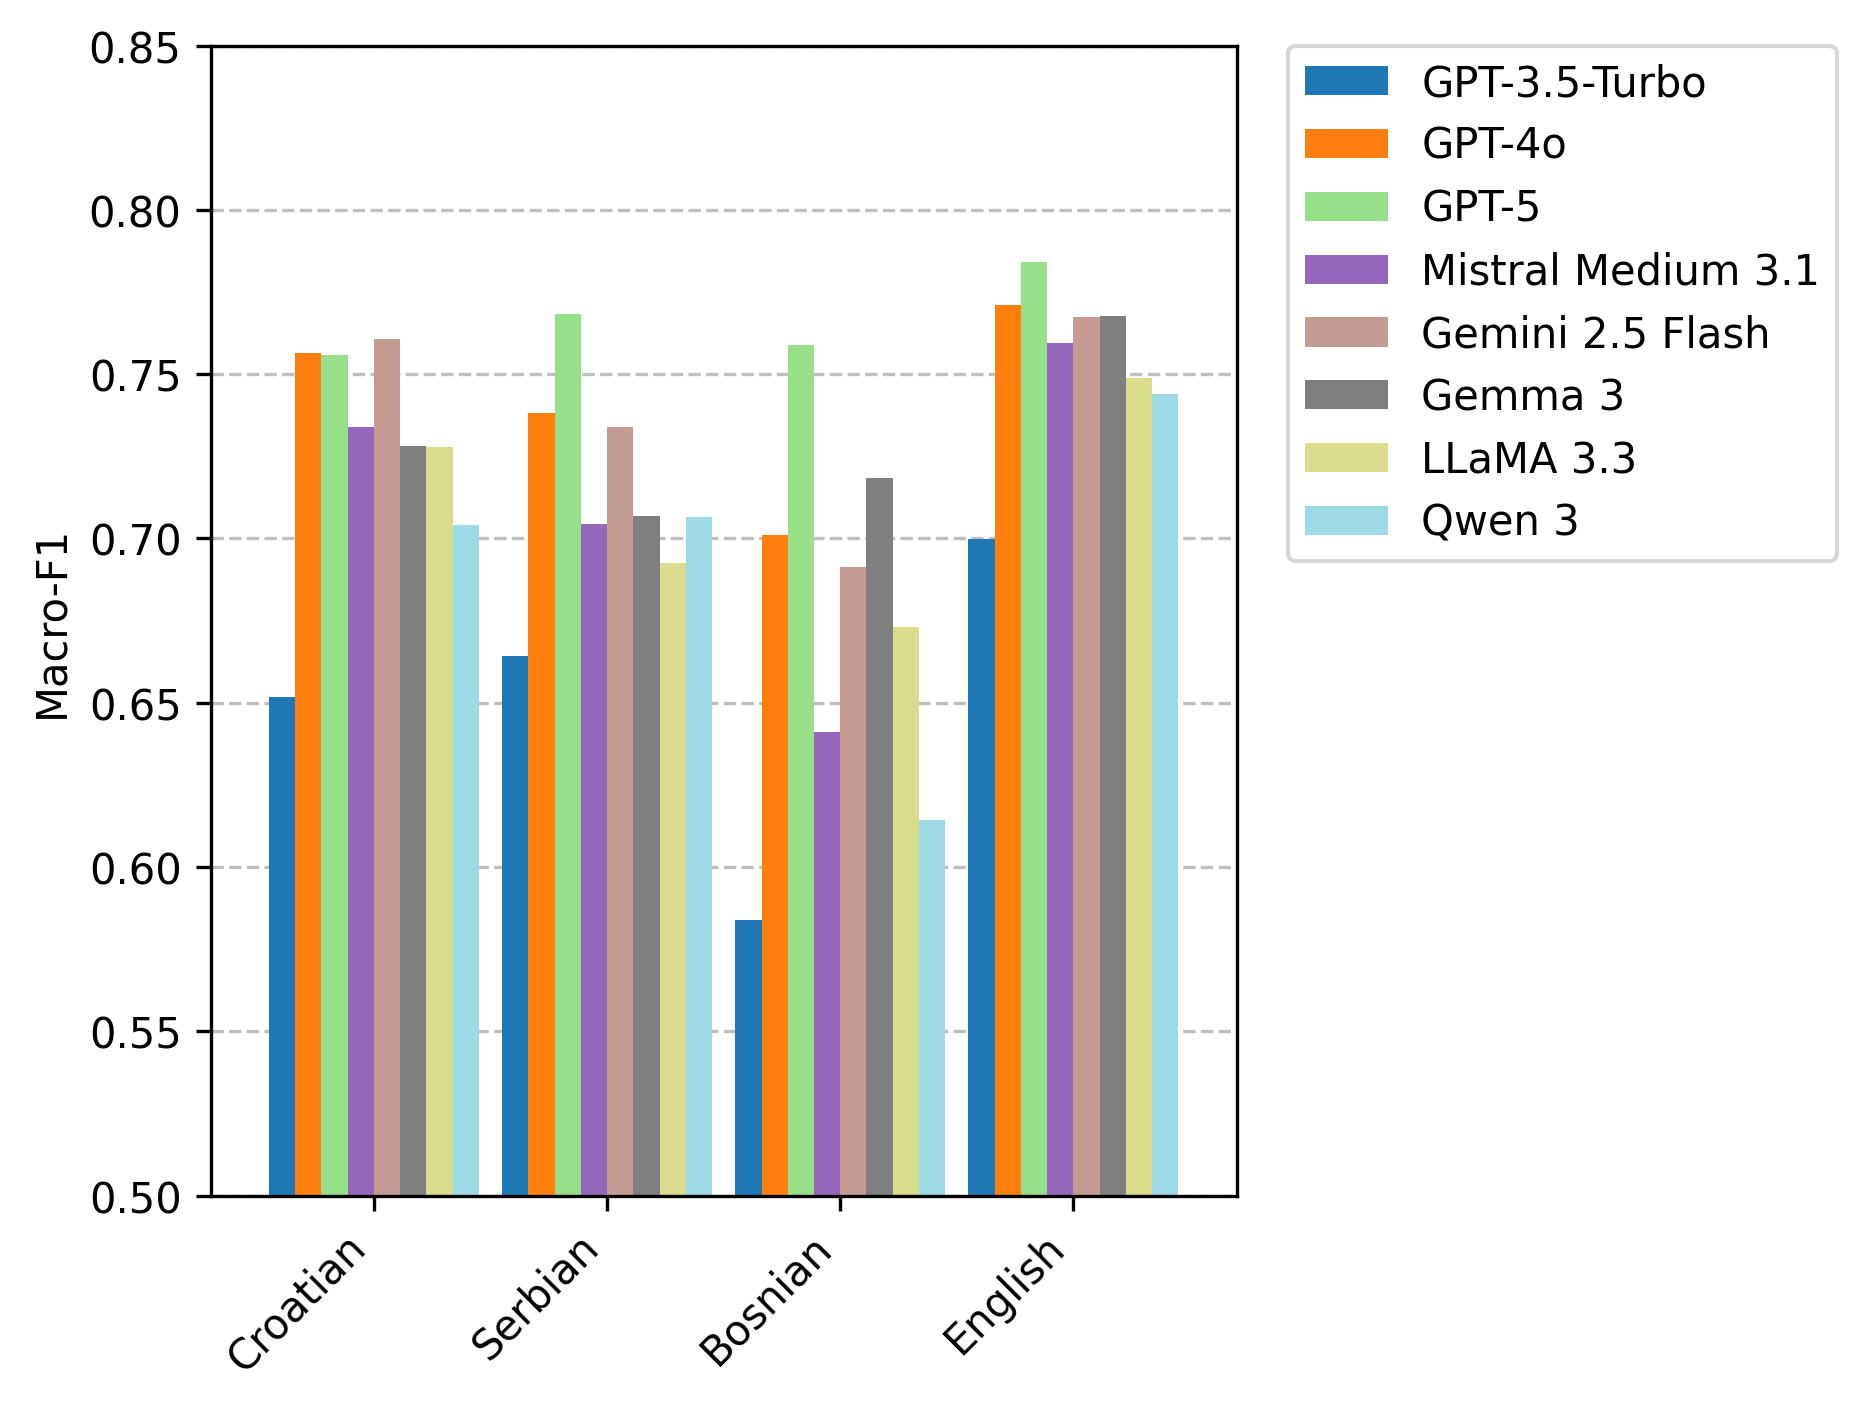

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.5, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Macro-F1")

# Add horizontal grid lines every 0.05
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(round(ymin, 2), round(ymax + 0.05, 2), 0.05))  # steps of 0.05
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("sentiment_gpt_comparison.png", dpi=300)
plt.show()


## Analyse precentage of Mix labels

In [38]:
import os

In [58]:
submission_folder = "systems/local-GPT-models/submissions"

In [59]:
def add_predictions_to_dataset(dataset_name, results):
    """The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
    Args:
    - dataset_name: should be "ParlaSent-EN-test" or "ParlaSent-BCS-test"
    """
    # Load the dataset
    if dataset_name == "ParlaSent-EN-test":
        test_df = pd.read_json("datasets/ParlaSent-EN-test/ParlaSent_EN_test.jsonl", lines=True)
    elif dataset_name == "ParlaSent-BCS-test":
        test_df = pd.read_json("datasets/ParlaSent-BSC-test/ParlaSent_BCS_test.jsonl", lines=True)

    # Extract predictions
    y_pred = results["predictions"][0]["predictions"]
    test_df["y_pred"] = y_pred

    return test_df

In [60]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

['submission-deepseek-r1:14b-ParlaSent-EN-test.json',
 'submission-llama3.3:latest-ParlaSent-EN-test.json',
 'submission-gemma3:27b-ParlaSent-EN-test.json',
 'submission-gemma3:27b-ParlaSent-BCS-test.json']

In [50]:
os.chdir("..")

In [61]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)
			# Get information on the dataset and the model
			model = results["system"]

			dataset_name = results["predictions"][0]["test"]

			test_df = add_predictions_to_dataset(dataset_name, results)
			
			print(model)
			print(dataset_name)
			print(test_df["y_pred"].value_counts(normalize=True))

deepseek-r1:14b
ParlaSent-EN-test
y_pred
Negative    0.476154
Positive    0.265385
Neutral     0.258462
Name: proportion, dtype: float64
llama3.3:latest
ParlaSent-EN-test
y_pred
Neutral     0.390000
Negative    0.305769
Positive    0.304231
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-EN-test
y_pred
Neutral     0.464231
Negative    0.274231
Positive    0.261538
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-BCS-test
y_pred
Neutral     0.510385
Negative    0.343846
Positive    0.145769
Name: proportion, dtype: float64
